## What is the relation between cryptocurrencies BTC, LTC, ETH, Stock Market and Gold in the past 10 years?

Hystorically, gold has an inverse relationship with the dollar. Presumably, when we experience a global market decline, stocks and currencies move downward. Some investments become less desirable and investors assume gold will give them some breathing room.[https://finance.yahoo.com/news/gold-correlation-equity-markets-150729355.html]


### Source Data:
**BTC -> USD past 10 yrs:** https://finance.yahoo.com/quote/BTC-USD/history?period1=1262332800&period2=1556521200&interval=1d&filter=history&frequency=1d

**ETH -> USD (2014-2019):** https://finance.yahoo.com/quote/ETH-USD/history?p=ETH-USD

**LTC -> USD (2014-2019):** https://finance.yahoo.com/quote/LTC-USD/history?p=LTC-USD

**Gold past 10 yrs:** https://www.quandl.com/data/WGC/GOLD_DAILY_USD-Gold-Prices-Daily-Currency-USD

**Stock Market S&P 500 past 10 yrs:** https://finance.yahoo.com/quote/%5EGSPC/history?period1=1262332800&period2=1556521200&interval=1d&filter=history&frequency=1d

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
# import seaborn as sns

In [310]:
BTC_USD_df = pd.read_csv('BTC-USD.csv')
stock_df = pd.read_csv('SP500_2010-2019_^GSPC.csv')
gold_df = pd.read_csv('WGC-GOLD_DAILY_USD.csv')
gold_df = gold_df[gold_df['Date'] >= '2010-01-01']
eth_df = pd.read_csv('ETH-USD.csv')
ltc_df = pd.read_csv('LTC-USD.csv')

In [311]:
# Transform the date to datetime
BTC_USD_df['Date'] = pd.to_datetime(BTC_USD_df['Date'])
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
ltc_df['Date'] = pd.to_datetime(ltc_df['Date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
gold_df['Date'] = pd.to_datetime(gold_df['Date'])

BTC_USD_df.set_index('Date', inplace=True)
eth_df.set_index('Date', inplace=True)
ltc_df.set_index('Date', inplace=True)
stock_df.set_index('Date', inplace=True)
gold_df.set_index('Date', inplace=True)

In [312]:
BTC_USD_df = BTC_USD_df[['Close']]
BTC_USD_df.rename(columns={'Close':'BTC'}, inplace=True)
eth_df = eth_df[['Close']]
eth_df.rename(columns={'Close':'ETH'}, inplace=True)
ltc_df = ltc_df[['Close']]
ltc_df.rename(columns={'Close':'LTC'}, inplace=True)
stock_df = stock_df[['Close']]
stock_df.rename(columns={'Close':'Stock_S&P500'}, inplace=True)
gold_df.rename(columns={'Value':'Gold'}, inplace=True)

In [313]:
BTC_USD_df.sort_index(inplace=True)
stock_df.sort_index(inplace=True)
gold_df.sort_index(inplace=True)
eth_df.sort_index(inplace=True)
ltc_df.sort_index(inplace=True)

In [314]:
market_gold_df = stock_df.join(gold_df)
market_gold_df.fillna(method='ffill', inplace=True)

correlation_df = BTC_USD_df.join(eth_df)
correlation_df = correlation_df.join(ltc_df)

btc_eth_ltc_df = correlation_df['2015-05':].copy()
btc_eth_ltc_df.fillna(method='ffill', inplace=True)

correlation_df = correlation_df.join(stock_df)
correlation_df = correlation_df.join(gold_df)
correlation_df.fillna(method='ffill', inplace=True)

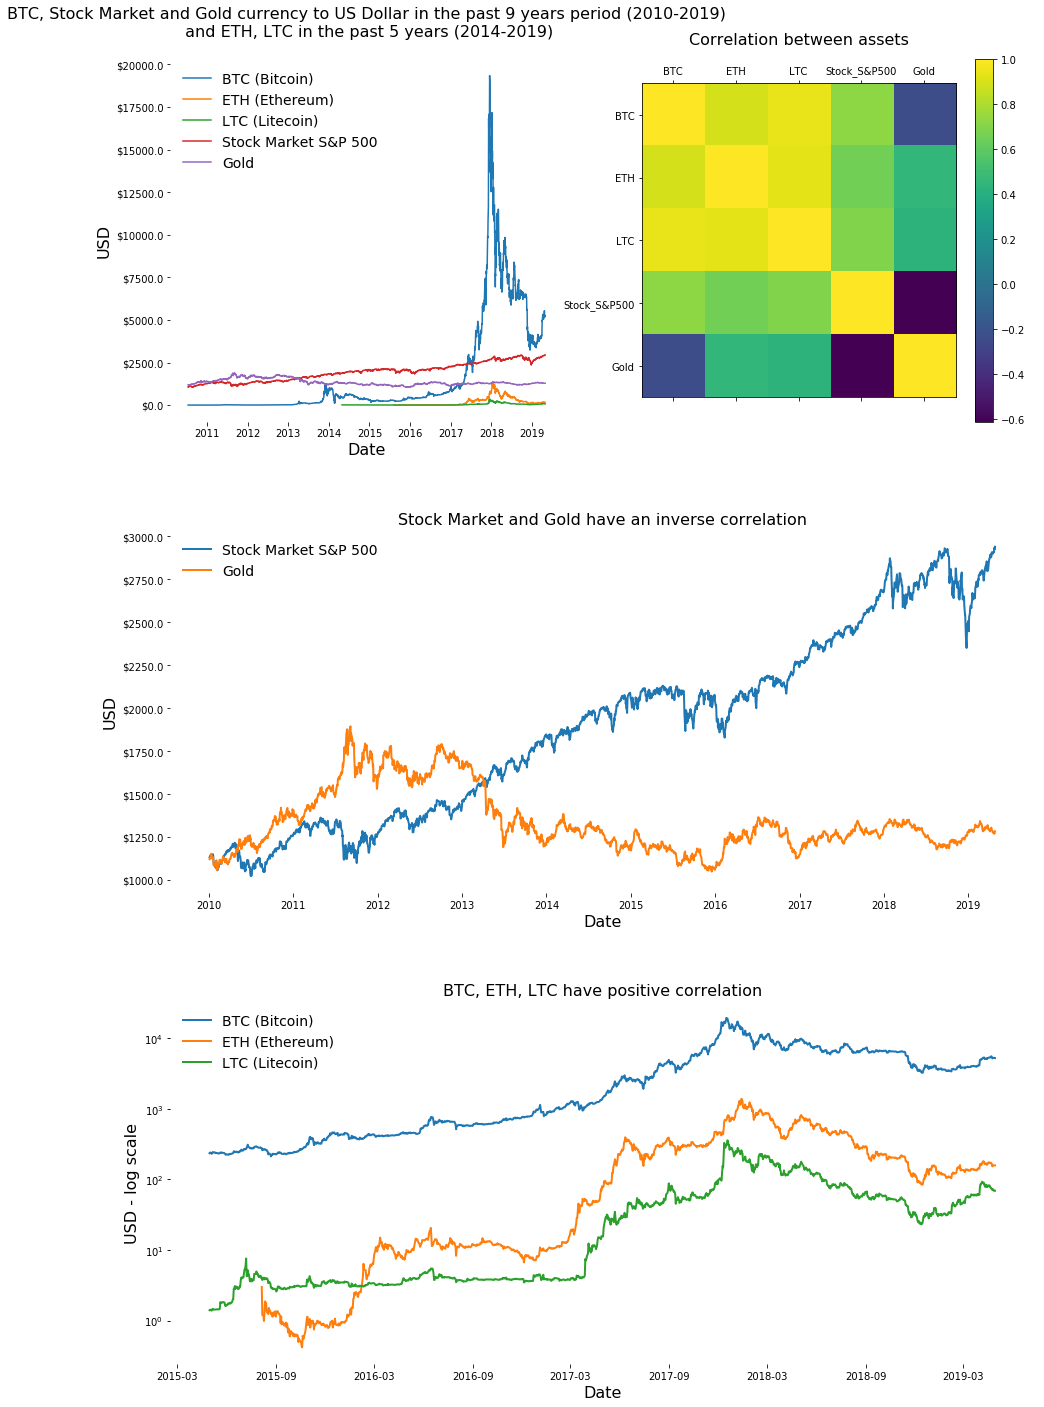

In [315]:
fig, ax = plt.subplots(sharex=True, figsize=(20,24))
ax1 = plt.subplot(313, frameon=False)
ax1.plot(btc_eth_ltc_df, linewidth=2)
ax1.set_title('BTC, ETH, LTC have positive correlation', fontsize=16);
ax1.legend(['BTC (Bitcoin)', 'ETH (Ethereum)', 'LTC (Litecoin)'], loc=2, fontsize=14, frameon=False);
plt.ylabel('USD - log scale', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.yscale('symlog', linthreshy=0.020)
for spine in ax1.spines.values():
    spine.set_visible(False)
  
ax2 = plt.subplot(312, frameon=False)
ax2.plot(market_gold_df, linewidth=2)
# format y axis as $
vals = ax2.get_yticks()
ax2.set_yticklabels(['${}'.format(z) for z in vals])
ax2.set_title('Stock Market and Gold have an inverse correlation', fontsize=16)
ax2.legend(['Stock Market S&P 500', 'Gold'], loc=2, fontsize=14, frameon=False)
plt.ylabel('USD', fontsize=16)
plt.xlabel('Date', fontsize=16)
for spine in ax2.spines.values():
    spine.set_visible(False)


ax3 = fig.add_subplot(321, frameon=False)
ax3.plot(correlation_df)
ax3.set_ylabel('USD', fontsize=16)
plt.xlabel('Date', fontsize=16)
# format y axis as $
vals = ax3.get_yticks()
ax3.set_yticklabels(['${}'.format(z) for z in vals])
# add a title
plt.title("BTC, Stock Market and Gold currency to US Dollar in the past 9 years period (2010-2019)\n and ETH, LTC in the past 5 years (2014-2019)\n",  fontsize=16)
ax3.legend(['BTC (Bitcoin)', 'ETH (Ethereum)', 'LTC (Litecoin)', 'Stock Market S&P 500', 'Gold'], loc=2, fontsize=14, frameon=False)
for spine in ax3.spines.values():
    spine.set_visible(False)

ax4 = plt.subplot(322)
fig4 = ax4.matshow(correlation_df.corr())
plt.xticks(range(len(correlation_df.columns)), correlation_df.columns)
plt.yticks(range(len(correlation_df.columns)), correlation_df.columns)
fig.colorbar(fig4,ax=ax4)
plt.title('Correlation between assets\n', fontsize=16)
plt.subplots_adjust(hspace=0.3, left=0.3)

plt.savefig('diana_assignment4.pdf')

After obtaining, processing and joining all 5 datasets (BTC, LTC, ETH, Gold and Stock Market currency in US Dollar) at a 1-day granularity, the instinct was to see how / if they are correlated or not.

My visualization, formed of 4 subplots, addresses this question and shows intuitively how cryptocurrencies are positively correlated (BTC with LTC and ETH), how Gold is historically inverse correlated with the Stock Market and most interestingly the figure shows that there is no correlation between cryptocurrencies and Stock market, as well as no correlation between cryptocurrencies and Gold.  

Did the learner describe their design choices in regards to Cairo's principle
of [truthfulness] (e.g., avoiding misleading representations) and relate
them to one or more elements of their visual?

-> [beauty]

Did the learner describe their design choices in regards to Cairo's principle
of [functionality] (e.g., choosing a charting type that is appropriate for the
stated research question) and relate them to one or more elements of
their visual?

Did the learner link Cairo's principle of [insightfulness] (i.e., producing a
"eureka" or "aha" response in the viewer) with one or more elements of
their visual?


[truthfulness]
In order to provide accurate research, first of all, I searched for curated data from trusted sources ( Yahoo! Finance has an estimated 70 million unique visitors each month, according to Statistica, January 2019).
Then I processed the data into data frames and decided to do 4 subplots, 3 simple line plots and a matrix plot.

The [beauty] of the figure comes from simplicity, colors, missing frames and layouts by calibrating the pads between subplots. 

As of [functionality], having to deal with time-series data, line charts are most often used. It's also easy to spot when prices droped or increased, and to do a fast relative comparison between currencies.

From all 4 subplots, the one I consider beeing most [insightfull] is the correlation matrix. 
Yellow grids from matrice's main diagonal, which have value 1, indicates a perfect positive linear relationship between variables (each currency correlates with itself).
-1 indicates a perfect negative linear relationship between variables (e.g stocks-gold p=aprox(-0.6), dark-indigo cells), and 0 indicates no linear relationship between variables (e.g BTC-gold p=aprox(-0.1), blue cells)

